## Data Cleaning

In [2]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [43]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


### detecting missing value with pandas

In [44]:
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [45]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [46]:
df[df['ST_NUM'].isnull()].shape

(2, 7)

In [47]:
df.shape

(9, 7)

### detection non-standard missing values

In [48]:
df['NUM_BEDROOMS'].value_counts()

3     3
1     1
2     1
--    1
na    1
Name: NUM_BEDROOMS, dtype: int64

In [65]:
invalid_num_bedrooms = ['--', 'na']

In [50]:
df[df['NUM_BEDROOMS'].isin(invalid_num_bedrooms)].index

Int64Index([7, 8], dtype='int64')

In [61]:
df = df.drop(df[df['NUM_BEDROOMS'].isin(invalid_num_bedrooms)].index)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,NaN,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950


In [76]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=invalid_num_bedrooms)
df2

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


### detecting unexpected missing values

In [53]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [54]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt += 1

In [55]:
cnt = 0
for row in df['NUM_BATH']:
    try:
        int(row)
        pass
    except ValueError:
        df.loc[cnt, 'NUM_BATH'] = np.nan
    cnt += 1

In [56]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,NaN,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [57]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        3
SQ_FT           1
dtype: int64

In [62]:
median_bedroom = df['NUM_BEDROOMS'].median()

In [64]:
df['NUM_BEDROOMS'].fillna(value=median_bedroom, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,NaN,--
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950


In [3]:
ob = pd.ExcelFile('obes.xls')
ob

In [4]:
ob.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [7]:
data_age = ob.parse(u'7.2', skiprows=4, skipfooter=14)

In [9]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [12]:
data_age.rename(columns={u'Unnamed: 0':u'Year'}, inplace=True)

In [13]:
data_age.dropna(inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [14]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.2+ KB


In [16]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

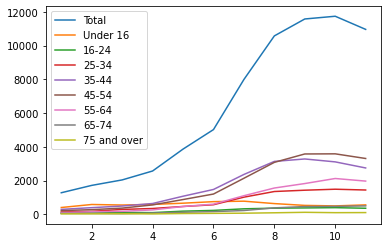

In [17]:
data_age.plot()
plt.show

In [18]:
data_age_2 = data_age.drop('Total', axis=1)

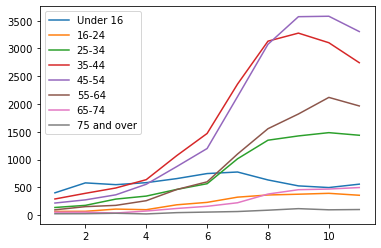

In [21]:
data_age_2.plot()
plt.show()

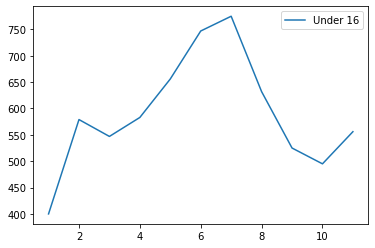

In [22]:
data_age_2['Under 16'].plot(label="Under 16", legend=True)
plt.show()

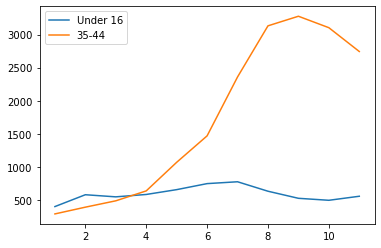

In [25]:
data_age_2['Under 16'].plot(label="Under 16", legend=True)
data_age_2['35-44'].plot(label="35-44", legend=True)
plt.show()

### Timeseries

In [61]:
from datetime import datetime as dt

In [62]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [63]:
date_rng.shape

(169,)

In [64]:
df = pd.DataFrame(date_rng, columns=['date'])

In [65]:
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [66]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [67]:
df

,date,data
0,2020-01-01 00:00:00,84
1,2020-01-01 01:00:00,58
2,2020-01-01 02:00:00,2
3,2020-01-01 03:00:00,84
4,2020-01-01 04:00:00,22
...,...,...
164,2020-01-07 20:00:00,71
165,2020-01-07 21:00:00,98
166,2020-01-07 22:00:00,3
167,2020-01-07 23:00:00,15


In [68]:
df['datetime'] = pd.to_datetime(df['date'])

In [69]:
df = df.set_index('datetime')

In [70]:
df

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,84
2020-01-01 01:00:00,2020-01-01 01:00:00,58
2020-01-01 02:00:00,2020-01-01 02:00:00,2
2020-01-01 03:00:00,2020-01-01 03:00:00,84
2020-01-01 04:00:00,2020-01-01 04:00:00,22
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,71
2020-01-07 21:00:00,2020-01-07 21:00:00,98
2020-01-07 22:00:00,2020-01-07 22:00:00,3


In [71]:
df.drop(['date'], axis=1, inplace=True)

In [72]:
df

,data
datetime,
2020-01-01 00:00:00,84
2020-01-01 01:00:00,58
2020-01-01 02:00:00,2
2020-01-01 03:00:00,84
2020-01-01 04:00:00,22
...,...
2020-01-07 20:00:00,71
2020-01-07 21:00:00,98
2020-01-07 22:00:00,3


In [73]:
string_date_rng = [str(x) for x in date_rng]

In [74]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [75]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [76]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [77]:
df.loc['2020-01-02']

,data
datetime,
2020-01-02 00:00:00,29
2020-01-02 01:00:00,13
2020-01-02 02:00:00,54
2020-01-02 03:00:00,95
2020-01-02 04:00:00,67
2020-01-02 05:00:00,39
2020-01-02 06:00:00,57
2020-01-02 07:00:00,4
2020-01-02 08:00:00,70


In [78]:
df.loc['2020-01-02' : '2020-01-04']

,data
datetime,
2020-01-02 00:00:00,29
2020-01-02 01:00:00,13
2020-01-02 02:00:00,54
2020-01-02 03:00:00,95
2020-01-02 04:00:00,67
...,...
2020-01-04 19:00:00,97
2020-01-04 20:00:00,91
2020-01-04 21:00:00,64


In [79]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,29
2020-01-02 01:00:00,13
2020-01-02 02:00:00,54
2020-01-02 03:00:00,95
2020-01-02 04:00:00,67
2020-01-02 05:00:00,39
2020-01-02 06:00:00,57
2020-01-02 07:00:00,4
2020-01-02 08:00:00,70


In [80]:
df.loc['2020-01-02']['data'].sum()

1251

In [81]:
df.resample('D').sum()

,data
datetime,
2020-01-01,1246
2020-01-02,1251
2020-01-03,1174
2020-01-04,1305
2020-01-05,1030
2020-01-06,1016
2020-01-07,1187
2020-01-08,73


In [82]:
df['rolling_sum'] = df.rolling(3).sum()
df

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,84,NaN
2020-01-01 01:00:00,58,NaN
2020-01-01 02:00:00,2,144.0
2020-01-01 03:00:00,84,144.0
2020-01-01 04:00:00,22,108.0
...,...,...
2020-01-07 20:00:00,71,164.0
2020-01-07 21:00:00,98,177.0
2020-01-07 22:00:00,3,172.0


In [83]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [84]:
df

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,84,NaN,144.0
2020-01-01 01:00:00,58,NaN,144.0
2020-01-01 02:00:00,2,144.0,144.0
2020-01-01 03:00:00,84,144.0,144.0
2020-01-01 04:00:00,22,108.0,108.0
...,...,...,...
2020-01-07 20:00:00,71,164.0,164.0
2020-01-07 21:00:00,98,177.0,177.0
2020-01-07 22:00:00,3,172.0,172.0


#### timeseries in dataset

In [92]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [86]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [87]:
opsd_daily.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [93]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', parse_dates=True, index_col=0)
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [94]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['month'] = opsd_daily.index.month
opsd_daily['day'] = opsd_daily.index.day
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,month,day
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29


In [96]:
opsd_daily.loc['2017']

,Consumption,Wind,Solar,Wind+Solar,Year,month,day
Date,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,1
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,2
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,3
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,4
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,5
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29


In [97]:
opsd_daily.loc['2017-2']

,Consumption,Wind,Solar,Wind+Solar,Year,month,day
Date,,,,,,,
2017-02-01,1627.965,221.296,23.817,245.113,2017,2,1
2017-02-02,1604.120,254.391,42.219,296.610,2017,2,2
2017-02-03,1574.576,188.038,24.223,212.261,2017,2,3
2017-02-04,1344.391,211.453,49.257,260.710,2017,2,4
2017-02-05,1238.879,118.332,46.216,164.548,2017,2,5
2017-02-06,1574.502,152.119,28.576,180.695,2017,2,6
2017-02-07,1621.574,264.513,29.271,293.784,2017,2,7
2017-02-08,1625.415,219.683,30.996,250.679,2017,2,8
2017-02-09,1637.740,207.538,45.278,252.816,2017,2,9


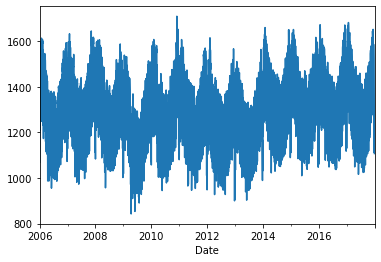

In [98]:
opsd_daily['Consumption'].plot()
plt.show()

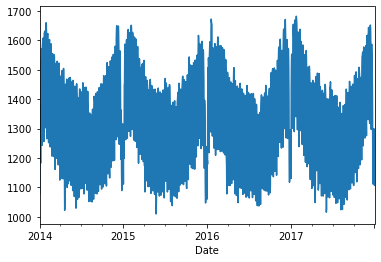

In [101]:
opsd_daily['2014':'2017']['Consumption'].plot()
plt.show()

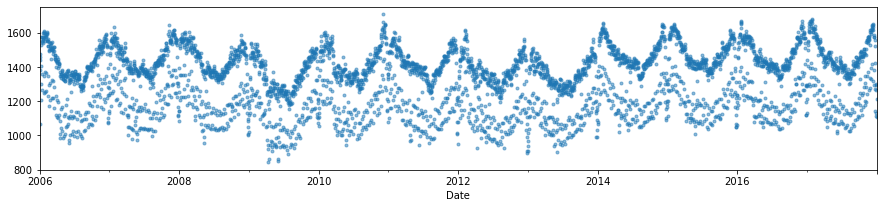

In [107]:
opsd_daily['Consumption'].plot(marker='.', alpha = 0.5, linestyle='None', figsize=(15,3))
plt.show()

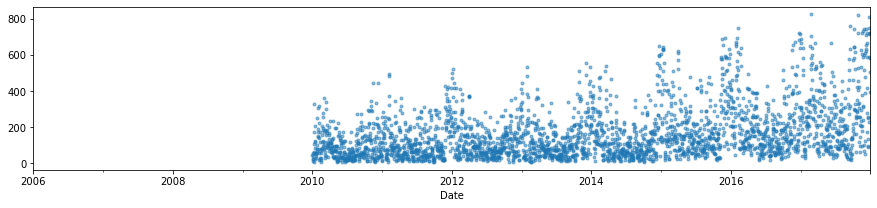

In [108]:
opsd_daily['Wind'].plot(marker='.', alpha = 0.5, linestyle='None', figsize=(15,3))
plt.show()

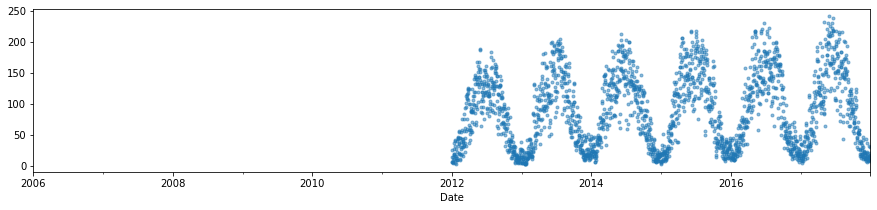

In [113]:
opsd_daily['Solar'].plot(marker='.', alpha = 0.5, linestyle='None', figsize=(15,3))
plt.show()

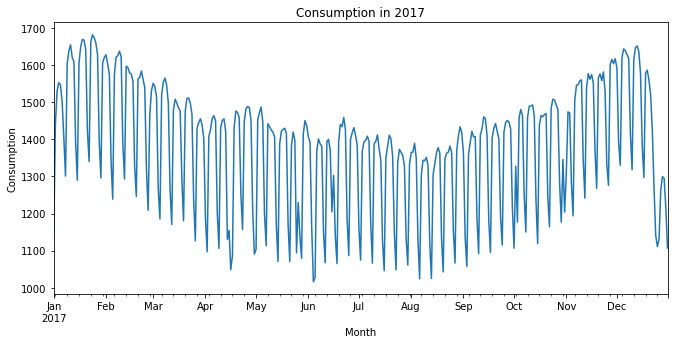

In [118]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,5))
ax.set_ylabel('Consumption')
ax.set_xlabel('Month')
ax.set_title("Consumption in 2017")
plt.show()

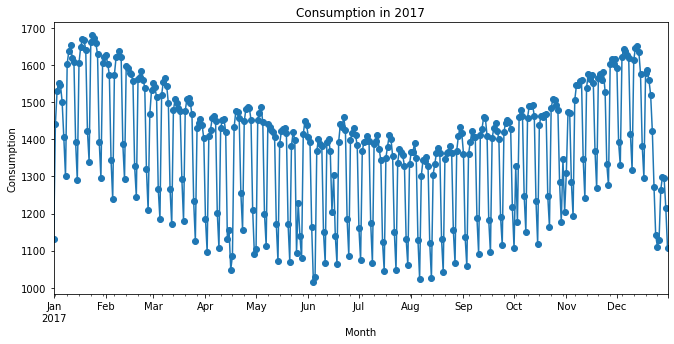

In [120]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,5), marker='o', linestyle='-')
ax.set_ylabel('Consumption')
ax.set_xlabel('Month')
ax.set_title("Consumption in 2017")
plt.show()

In [126]:
opsd_weekly = opsd_daily.resample('W').mean()

<AxesSubplot:xlabel='Date'>

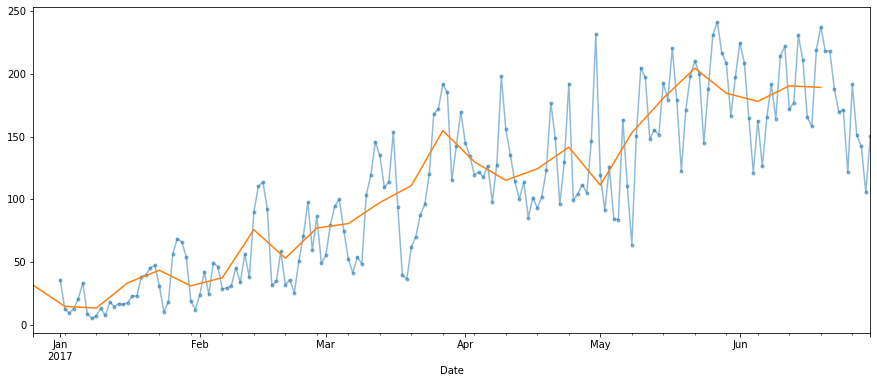

In [143]:
start, end = '2017-01', '2017-06'
opsd_daily.loc[start:end, 'Solar'].plot(marker='.', alpha=0.5, linestyle='-', figsize=(15,6))
opsd_weekly.loc[start:end, 'Solar'].plot(figsize=(15,6))

In [129]:
opsd_weekly

,Consumption,Wind,Solar,Wind+Solar,Year,month,day
Date,,,,,,,
2006-01-01,1069.184000,NaN,NaN,NaN,2006.0,1.000000,1.000000
2006-01-08,1381.300143,NaN,NaN,NaN,2006.0,1.000000,5.000000
2006-01-15,1486.730286,NaN,NaN,NaN,2006.0,1.000000,12.000000
2006-01-22,1490.031143,NaN,NaN,NaN,2006.0,1.000000,19.000000
2006-01-29,1514.176857,NaN,NaN,NaN,2006.0,1.000000,26.000000
...,...,...,...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143,2017.0,11.428571,17.142857
2017-12-10,1554.824946,636.514714,16.440286,652.955000,2017.0,12.000000,7.000000
2017-12-17,1543.856889,442.531857,18.143714,460.675571,2017.0,12.000000,14.000000
